## 1. Data Cleaning and Engineering

### Loading necessary libraries

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import randint

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Importing data

In [42]:
from ucimlrepo import fetch_ucirepo 
  
credit_data = fetch_ucirepo(id=144) 
  
X = credit_data.data.features 
y = credit_data.data.targets 
   
#print(credit_data.variables) 

In [43]:
X = X.rename({"Attribute1":'check_amount',"Attribute2":'duration',"Attribute3":'cred_hist',"Attribute4":'purpose',
        "Attribute5":'amount', "Attribute6":'saving',"Attribute7":'employment',"Attribute8":'inst_rate',
        "Attribute9":'gender_status', "Attribute10":'debtor', "Attribute11":'resid',"Attribute12":'property',
        "Attribute13":'age', "Attribute14":'other_inst',"Attribute15":'housing', "Attribute16":'credit_quan',
        "Attribute17":'job', "Attribute18":'people_liability',"Attribute19":'telephone',"Attribute20":'foreign_worker'},
        axis=1)
X.head()

,check_amount,duration,cred_hist,purpose,amount,saving,employment,inst_rate,gender_status,debtor,resid,property,age,other_inst,housing,credit_quan,job,people_liability,telephone,foreign_worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


#### Scaling quantitative values

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[['amount','duration','age','inst_rate']] = scaler.fit_transform(X[['amount','duration','age','inst_rate']])

#### Some feature engineering and cleaning

In [45]:
X['foreign_worker'] = np.where(X['foreign_worker'] == 'A201', 1, 0)

X['telephone'] = np.where(X['telephone'] == 'A192', 1, 0)

X['gender'] = np.where(X['gender_status'].isin(['A92', 'A95']), 1, 0)
X.drop('gender_status',axis=1, inplace=True)

y['class'] = y['class'].replace(2, 0)

data = X

data = data.join(y)

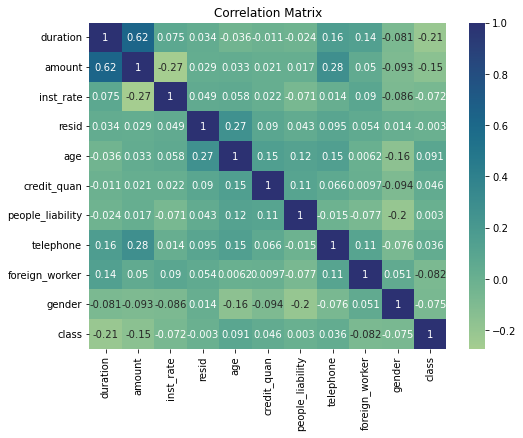

In [46]:
plt.figure(figsize=(8,6))

correl = data.corr()
sns.heatmap(correl, cmap='crest', annot=True)

plt.title('Correlation Matrix')
plt.show()

In [47]:
df = data.copy()

map1 = {
    "A11" : "x<0",
    "A12" : "0<=x<200",
    "A13" : 'x>=200',
    "A14" : "no account"
}


map2 = {
    "A30" : 'no credits',
    "A31" : "all creds. paid duly",
    "A32" : "exist. creds. paid duly",
    "A33" : "delay",
    "A34" : "other credits"
}

map3 = {
    "A40" : "new car",
	      "A41" : "used car",
	      "A42" : "furniture",
	      "A43" : "radio/tv",
	      "A44" : "domestic app.",
	      "A45" : "repairs",
	      "A46" : "educ",
	      "A48" : "training",
	      "A49" : "business",
	      "A410" : "others"
}

map4 = {
    "A61" : "x < 100",
    "A62" : "100<= x <500",
    "A63" : "500<= x <1000",
    "A64" :  "x >= 1000",
    "A65" : "no savings acc"
}

map5 = {
    "A71" : "unemployed",
    "A72" : "less than 1",
    "A73" : 'between 1 and 4',  
    "A74" : "between 4 and 7",
    "A75" :"more than 7"
}

map6 = {
    1 : 'female',
    0 : 'male'
}

map7 = {
    "A101" : "none",
    "A102" : "co-applicant",
    "A103" : "guarantor"
}

map8 = {
    "A121" : "real estate",
    "A122" : "life insurance",
    "A123" : "car & other",
    "A124" : "unknown, no property"
}

map9 = {
    "A141" : "bank",
    'A142' : "stores",
    "A143" : "none"
}

map10 = {
    "A151" : "rent",
    "A152" : "own",
    "A153" : "for free"
}

map11 = {
    "A171" : "unemployed",
    "A172" : "unskilled resident",
    "A173" : "employee",
    "A174" : "management / self-employed",
}

map12 = {
    1 : 'own',
    0 : 'none'
}

map13 = {
    1 : 'foreign',
    0 : 'local'
}

df['check_amount'] = df['check_amount'].map(map1)
df['cred_hist'] = df['cred_hist'].map(map2)
df['purpose'] = df['purpose'].map(map3)
df['saving'] = df['saving'].map(map4)
df['employment'] = df['employment'].map(map5)
df['gender'] = df['gender'].map(map6)
df['debtor'] = df['debtor'].map(map7)
df['property'] = df['property'].map(map8)
df['other_inst'] = df['other_inst'].map(map9)
df['housing'] = df['housing'].map(map10)
df['job'] = df['job'].map(map11)
df['telephone'] = df['telephone'].map(map12)
df['foreign_worker'] = df['foreign_worker'].map(map13)

df.to_excel('data.xlsx', index=False)

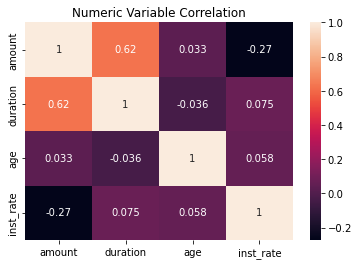

In [48]:
sns.heatmap(df[['amount','duration','age','check_amount','inst_rate']].corr(), annot=True)
plt.title('Numeric Variable Correlation')
plt.show()

##### Here, I used LabelEncoding for those are ordinal - order of numbers has an actual meaning (ex.: 1) x<200, 2) 400>=x>=200, 3) x>400 and etc.) For the nominal variables I utilized OneHotEncoding method as classifying the values with numbers can mislead linear models.

In [49]:
ordinal = ['saving', 'check_amount']
nominal = ['job','housing','purpose','cred_hist','property','employment','other_inst','debtor']

le = LabelEncoder()

for col in ordinal:
    data[col] = le.fit_transform(data[col])
    
data = pd.get_dummies(data, columns=nominal, drop_first=True)

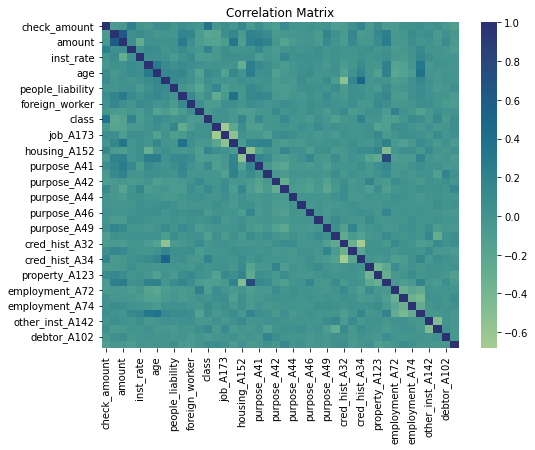

In [50]:
plt.figure(figsize=(8,6))

corr = data.corr()
sns.heatmap(corr, cmap='crest')

plt.title('Correlation Matrix')
plt.show()

In [51]:
np.fill_diagonal(corr.values, np.nan)

max_corr = round(corr.max().max(),3)
print('Max correlation between the variables is:', max_corr)

Max correlation between the variables is: 0.78


##### Max. correlation is 0.78, this doesn't create serious multicollinearity, so we can ignore that.

## 2. Model Selection

In [52]:
from sklearn.model_selection import train_test_split

X = data.drop('class',axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score, accuracy_score, brier_score_loss, log_loss

#### For the sake of simplicity we will use only 3 models. Logistic Regression, Random Forest Classifier and Gradient Boosting Classifier. For further improvements, we can utilize different models. 

In [54]:
lr = LogisticRegression() #linear model
gb = GradientBoostingClassifier() #tree-based ensemble model
rf = RandomForestClassifier() #tree-based ensemble model

#### Again, for the simplicity of the model, we will use RandomizedSearchCV, but not GridSearchCV as it is fast and efficient. Additionally, although generally GridSearchCV generates better models it only improved model very low.

In [55]:
param_rf = {
    'n_estimators': randint(130, 205),       
    'max_depth': [5, 10, 15, 20],     
    'min_samples_split': randint(2, 10),     
    'min_samples_leaf': randint(1, 5),       
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True],              
}


param_gb = {
    'n_estimators': randint(130, 200),         
    'learning_rate': [0.01, 0.03, 0.05, 0.07],      
    'max_depth': [3, 4, 5],                 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],            
    'max_features': ['sqrt', 'log2']   
}

param_lr = {
    'penalty': ['l1', 'l2'],                
    'C': [0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 1, 10],    
}

#### Searching for the new optimal hyperparameters and training the models with them

In [41]:
%%time
lr_random = RandomizedSearchCV(estimator=lr, param_distributions=param_lr,
                               n_iter=40, scoring='roc_auc', cv=5, random_state=44, n_jobs=-1)

lr_random.fit(X_train,y_train)

print("Best LR Parameters:")
print(lr_random.best_params_)
print("Best LR ROC-AUC Score (CV):", lr_random.best_score_)

Best LR Parameters:
{'penalty': 'l2', 'C': 0.1}
Best LR ROC-AUC Score (CV): 0.7812245432816862
CPU times: total: 93.8 ms
Wall time: 386 ms


In [44]:
%%time

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_rf,
                               n_iter=50, scoring='roc_auc', cv=5, random_state=44, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best RF Parameters:")
print(rf_random.best_params_)
print("Best LR ROC-AUC Score (CV):", rf_random.best_score_)

Best RF Parameters:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 201}
Best LR ROC-AUC Score (CV): 0.7931151849437563
CPU times: total: 859 ms
Wall time: 16.1 s


In [45]:
%%time
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=param_gb,
                               n_iter=40, scoring='roc_auc', cv=5, random_state=44, n_jobs=-1)

gb_random.fit(X_train,y_train)

print("Best GB Parameters:")
print(gb_random.best_params_)
print("Best GB ROC-AUC Score (CV):", gb_random.best_score_)

Best GB Parameters:
{'learning_rate': 0.07, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 179}
Best GB ROC-AUC Score (CV): 0.7825151481722911
CPU times: total: 609 ms
Wall time: 8.11 s


In [56]:
LR = LogisticRegression(C=0.1, penalty='l2')

RF = RandomForestClassifier(bootstrap = 'True', max_depth = 20, max_features = 'sqrt', min_samples_leaf = 3,
                           min_samples_split=7, n_estimators=189)

GB = GradientBoostingClassifier(learning_rate=0.03, max_depth=5, max_features = 'sqrt', min_samples_leaf = 2,
                               min_samples_split=5, n_estimators=183)

In [57]:
model_names = {
    'Logistic Regression' : LR,
    'Random Forest' : RF,
    'Gradient Boosting' : GB 
}

##### Average ROC-AUC score is 0.8 and accuracy scores differing from 0.775-0.805 (still close numbers). These indicators let us rely on the prediction results.

In [58]:
model_predictions = {}

for name, model in model_names.items():
    model.fit(X_train, y_train)
    pred_proba = model.predict_proba(X_test)
    pred = model.predict(X_test)
    model_predictions[name] = pred_proba[:,1]
    
    auc = roc_auc_score(y_test, pred_proba[:,1]).round(3)
    accuracy = accuracy_score(y_test, pred).round(3)
    
    print(f'{name} ROC-AUC score:', auc, f'and accuracy score: {accuracy}')

Logistic Regression ROC-AUC score: 0.803 and accuracy score: 0.775
Random Forest ROC-AUC score: 0.8 and accuracy score: 0.795
Gradient Boosting ROC-AUC score: 0.805 and accuracy score: 0.805


In [64]:
from sklearn.metrics import RocCurveDisplay
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

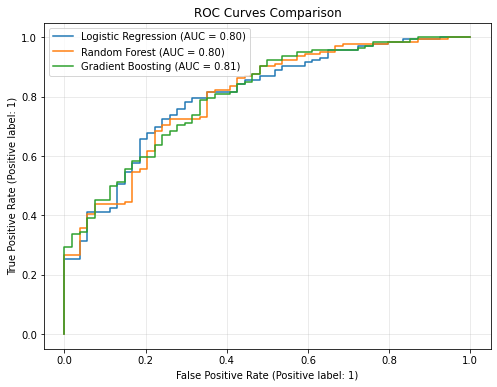

In [65]:
plt.figure(figsize=(8,6))

for names, probs in model_predictions.items():
    RocCurveDisplay.from_predictions(y_test, probs, name=names, ax=plt.gca())

plt.legend(fontsize=10)
plt.title('ROC Curves Comparison')
plt.grid(alpha=0.3)
plt.show()

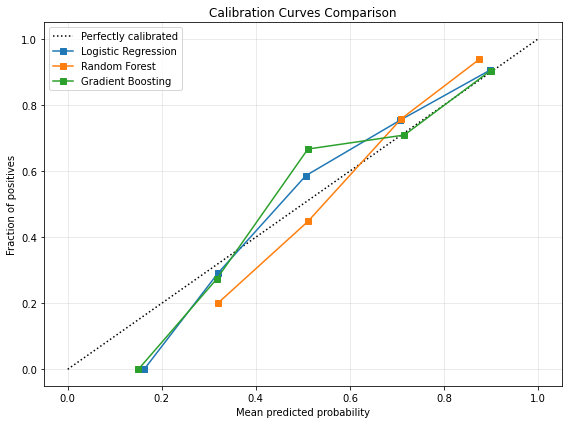

In [66]:
plt.figure(figsize=(8,6))

for names, probs in model_predictions.items():
    CalibrationDisplay.from_predictions(y_test, probs, name=names, ax=plt.gca())
    
plt.title('Calibration Curves Comparison')
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

#### Interpretation
LR and GB follow the diagonal line more closely rather than RF at higher rates (above 0.7), while they overestimate probabilities between middle section (0.4-0.7). At the same time, LR and GB underestimates at lower rates (below 0.3). Meanwhile, RF underestimates at lower rates and overestimates at higher rates.

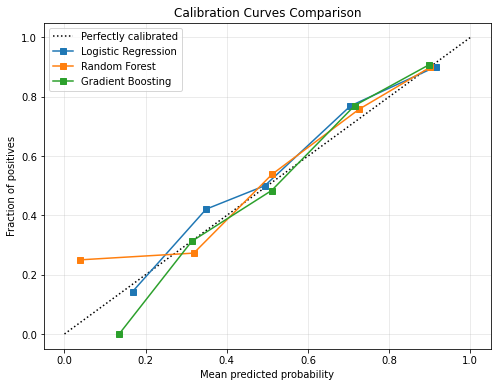

In [71]:
plt.figure(figsize=(8,6))

for names, model in model_names.items():
    cal_pred = CalibratedClassifierCV(model, method = 'isotonic', cv=5).fit(X_train, y_train)
    prediction = cal_pred.predict_proba(X_test)
    CalibrationDisplay.from_predictions(y_test, prediction[:,1], name=names, ax=plt.gca())
    
plt.title('Calibration Curves Comparison')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

#### Interpretation
Here, all models follow the diagonal line closely, slightly overestimating at times. RF overestimates while GB slightly underestimates at lower rates (below 0.3). Models improved.

In [72]:
for model, prob in model_predictions.items():
    print(f'{model} has a brier score of: {brier_score_loss(y_test, prob).round(3)} and \n                     log loss score of: {log_loss(y_test, prob).round(3)}')
    print('\n')

Logistic Regression has a brier score of: 0.15 and 
                     log loss score of: 0.462


Random Forest has a brier score of: 0.153 and 
                     log loss score of: 0.471


Gradient Boosting has a brier score of: 0.146 and 
                     log loss score of: 0.449




#### Interpretation
With a Brier Score around 0.15, the models demonstrate reasonably good probability calibration — the predicted risks are close to the true outcomes without large over- or under-confidence.
The models’ log-loss values of 0.45–0.47 indicate that the classifiers are making accurate and well-calibrated probability estimates.